In [4]:
import pyam
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.colors
import numpy as np
sns.set_theme(style="whitegrid")

results_19_path = '../../../data/TOD/model_results/to_share/model_results_to_share_Chapter_19.xlsx'

df_19 = pyam.IamDataFrame(results_19_path)
df_3_groups = df_19.filter(region=[
    'High-Income',
    'Low-Income',
    'Middle-Income',
])
df_6_groups = df_19.filter(region=[
    'High-Income, High Density',
    'High-Income, Low Density',
    'Low-Income, High Density',
    'Low-Income, Low Density',
    'Middle-Income, High Density',
    'Middle-Income, Low Density'])



[INFO] 12:49:56 - pyam.core: Reading file ..\..\..\data\TOD\model_results\to_share\model_results_to_share_Chapter_19.xlsx


In [5]:
color_dict = {
    'Secondary Energy|Electricity|Coal': 'black',
    'Secondary Energy|Electricity|Oil': 'darkslategray',
    'Secondary Energy|Electricity|Gas': 'lightpink',
    'Secondary Energy|Electricity|Nuclear': 'purple',
    'Secondary Energy|Electricity|Biomass': 'forestgreen',
    'Secondary Energy|Electricity|Hydro': 'blue',
    'Secondary Energy|Electricity|Solar': 'gold',
    'Secondary Energy|Electricity|Wind': 'dodgerblue',
    'Secondary Energy|Electricity|Non-Biomass Renewables': 'darkgoldenrod',
    'Primary Energy|Coal': 'black',
    'Primary Energy|Oil': 'darkslategray',
    'Primary Energy|Gas': 'lightpink',
    'Primary Energy|Nuclear': 'purple',
    'Primary Energy|Biomass': 'forestgreen',
    'Primary Energy|Hydro': 'blue',
    'Primary Energy|Solar': 'gold',
    'Primary Energy|Wind': 'dodgerblue',
    'Final Energy|Other Sector': 'firebrick',
    'Final Energy|Transportation': 'darkslategray',
    'Final Energy|Bunkers': 'dodgerblue',
    'Final Energy|Residential and Commercial': 'darkgoldenrod',
    'Final Energy|Industry': 'black',
    'Final Energy|Hydrogen': 'blue',
    'Final Energy|Electricity': 'darkgoldenrod',
    'Final Energy|Heat': 'red',
    'Final Energy|Gases': 'lightpink',
    'Final Energy|Liquids': 'darkslategray',
    'Final Energy|Solids': 'black',
    'Final Energy|Bunkers|Per Capita GWh': 'dodgerblue',
    'Final Energy|Industry|Per Capita GWh': 'black',
    'Final Energy|Transportation|Per Capita GWh': 'darkslategray',
    'Final Energy|Other Sector|Per Capita GWh': 'firebrick',
    'Final Energy|Residential and Commercial|Per Capita GWh': 'darkgoldenrod',
    'Food Demand|Crops': 'darkolivegreen',
    'Food Demand|Livestock': 'skyblue',
    'Agricultural Demand|Energy|Crops': 'blueviolet',
    'Agricultural Demand|Non-Energy|Crops|Feed': 'darkgoldenrod',
    'Agricultural Demand|Non-Energy|Crops|Food': 'darkolivegreen',
    'Agricultural Demand|Non-Energy|Crops|Other': 'forestgreen',
    'Water Quality|Nitrogen|Delivery|Agriculture': 'darkolivegreen',
    'Water Quality|Nitrogen|Delivery|Aquaculture': 'dodgerblue',
    'Water Quality|Nitrogen|Delivery|Natural': 'forestgreen',
    'Water Quality|Nitrogen|Delivery|Pointsources': 'darkslategray',
    'Water Quality|Phosphorus|Delivery|Agriculture': 'darkolivegreen',
    'Water Quality|Phosphorus|Delivery|Aquaculture': 'dodgerblue',
    'Water Quality|Phosphorus|Delivery|Natural': 'forestgreen',
    'Water Quality|Phosphorus|Delivery|Pointsources':  'darkslategray',
    'Water Withdrawal|Electricity': 'blueviolet',
    'Water Withdrawal|Industrial Water': 'darkslategray',
    'Water Withdrawal|Irrigation': 'darkolivegreen',
    'Water Withdrawal|Municipal Water': 'dodgerblue',
    'Emissions|N2O': 'darkslategray',
    'Emissions|CH4': 'darkgoldenrod',
    'Emissions|CO2|AFOLU': 'darkolivegreen',
    'Emissions|CO2|Energy': 'blueviolet',
    
    
    }

## Stacked Energy

In [6]:
energy_vars=['Primary Energy',
            'Primary Energy|Biomass',
            'Primary Energy|Coal',
            'Primary Energy|Gas',
            'Primary Energy|Non-Biomass Renewables',
            'Primary Energy|Nuclear',
            'Primary Energy|Oil',
            'Secondary Energy|Electricity',
            'Secondary Energy|Electricity|Biomass',
            'Secondary Energy|Electricity|Coal',
            'Secondary Energy|Electricity|Gas',
            'Secondary Energy|Electricity|Non-Biomass Renewables',
            'Secondary Energy|Electricity|Nuclear',
            'Secondary Energy|Electricity|Oil',
            'Final Energy',
            'Final Energy|Bunkers',
            'Final Energy|Industry',
            'Final Energy|Other Sector',
            'Final Energy|Residential and Commercial',
            'Final Energy|Transportation',
            'Final Energy|Per Capita',
            'Final Energy|Bunkers|Per Capita',
            'Final Energy|Industry|Per Capita',
            'Final Energy|Transportation|Per Capita',
            'Final Energy|Other Sector|Per Capita',
            'Final Energy|Residential and Commercial|Per Capita',
           ]

df_3_energy_geo_trans = df_3_groups.filter(
    variable=energy_vars,
    scenario=['TECH-TP', 'LIFE-TP']
)

df_3_energy_geo_trans.multiply("Final Energy|Bunkers|Per Capita",277.777778,"Final Energy|Bunkers|Per Capita GWh",append=True)
df_3_energy_geo_trans.multiply("Final Energy|Industry|Per Capita",277.777778,"Final Energy|Industry|Per Capita GWh",append=True)
df_3_energy_geo_trans.multiply("Final Energy|Other Sector|Per Capita",277.777778,"Final Energy|Other Sector|Per Capita GWh",append=True)
df_3_energy_geo_trans.multiply("Final Energy|Residential and Commercial|Per Capita",277.777778,"Final Energy|Residential and Commercial|Per Capita GWh",append=True)
df_3_energy_geo_trans.multiply("Final Energy|Transportation|Per Capita",277.777778,"Final Energy|Transportation|Per Capita GWh",append=True)

df_3_energy_geo_all = df_3_groups.filter(
    variable=energy_vars,
    scenario=['REF','TECH-TP', 'LIFE-TP']
)
print(df_6_groups)
df_6_energy_geo_trans = df_6_groups.filter(
    variable=energy_vars,
    scenario=['TECH-TP', 'LIFE-TP']
)

df_3_energy_geo_ref = df_3_groups.filter(
    variable=energy_vars,
    scenario=['REF']
)
df_3_energy_geo_ref.multiply("Final Energy|Per Capita",277.777778,"Final Energy|Per Capita MWh",append=True)

df_6_energy_geo_ref = df_6_groups.filter(
    variable=energy_vars,
    scenario=['REF']
)

df_6_energy_geo_trans.timeseries()



<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, Food, GEM-E3_V2023, ... Water (9)
 * scenario : LIFE-TP, REF, TECH-TP (3)
Timeseries data coordinates:
   region   : High-Income, High Density, High-Income, Low Density, ... Middle-Income, Low Density (6)
   variable : Agricultural Production|Non-Energy|Crops, Area, ... Yield|Cereal (58)
   unit     : %, EJ / million / a, EJ/yr, Mt CH4/yr, ... t DM/ha/yr (20)
   year     : 2010, 2020, 2025, 2030, 2035, 2040, 2045, 2050 (8)


2010  \
model  scenario region                     variable                                           unit                         
Energy LIFE-TP  High-Income, High Density  Final Energy                                       EJ/yr             60.80000   
                                           Final Energy|Bunkers                               EJ/yr              4.34000   
                                           Final Energy|Bunkers|Per Capita                    EJ / million / a   0.00804   
                                           Final Energy|Industry                              EJ/yr             19.50000   
                                           Final Energy|Industry|Per Capita                   EJ / million / a   0.03620   
...                                                                                                                  ...   
       TECH-TP  Middle-Income, Low Density Secondary Energy|Electricity|Coal                  EJ/yr              1.37000   
                                           Secondary Energy|Electricity|Gas                   EJ/yr              1.68000   
                                           Secondary Energy|Electricity|Non-Biomass Renewa... EJ/yr              2.29000   
                                           Secondary Energy|Electricity|Nuclear               EJ/yr              0.73900   
                                           Secondary Energy|Electricity|Oil                   EJ/yr              0.24700   

                                                                                                                    2020  \
model  scenario region                     variable                                           unit                         
Energy LIFE-TP  High-Income, High Density  Final Energy                                       EJ/yr             52.70000   
                                           Final Energy|Bunkers                               EJ/yr              3.04000   
                                           Final Energy|Bunkers|Per Capita                    EJ / million / a   0.00551   
                                           Final Energy|Industry                              EJ/yr             17.50000   
                                           Final Energy|Industry|Per Capita                   EJ / million / a   0.03170   
...                                                                                                                  ...   
       TECH-TP  Middle-Income, Low Density Secondary Energy|Electricity|Coal                  EJ/yr              1.97000   
                                           Secondary Energy|Electricity|Gas                   EJ/yr              2.80000   
                                           Secondary Energy|Electricity|Non-Biomass Renewa... EJ/yr              2.70000   
                                           Secondary Energy|Electricity|Nuclear               EJ/yr              1.01000   
                                           Secondary Energy|Electricity|Oil                   EJ/yr              0.32400   

                                                                                                                    2025  \
model  scenario region                     variable                                           unit                         
Energy LIFE-TP  High-Income, High Density  Final Energy                                       EJ/yr             46.70000   
                                           Final Energy|Bunkers                               EJ/yr              3.71000   
                                           Final Energy|Bunkers|Per Capita                    EJ / million / a   0.00668   
                                           Final Energy|Industry                              EJ/yr             16.30000   
                                           Final Energy|Industry|Per Capita                   EJ / million / a   0.02930   
...                   

## Final and Electricity 

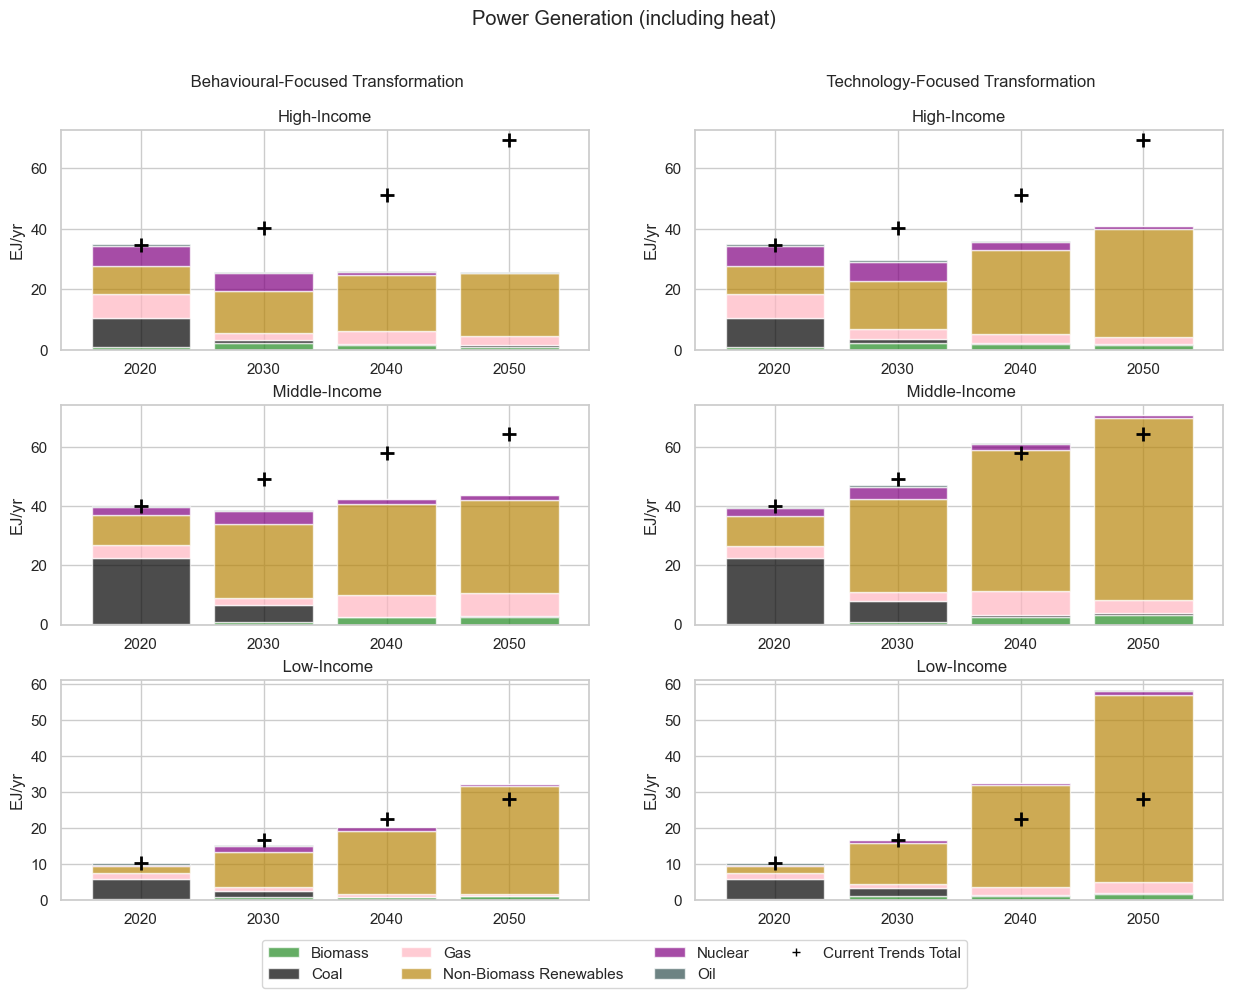

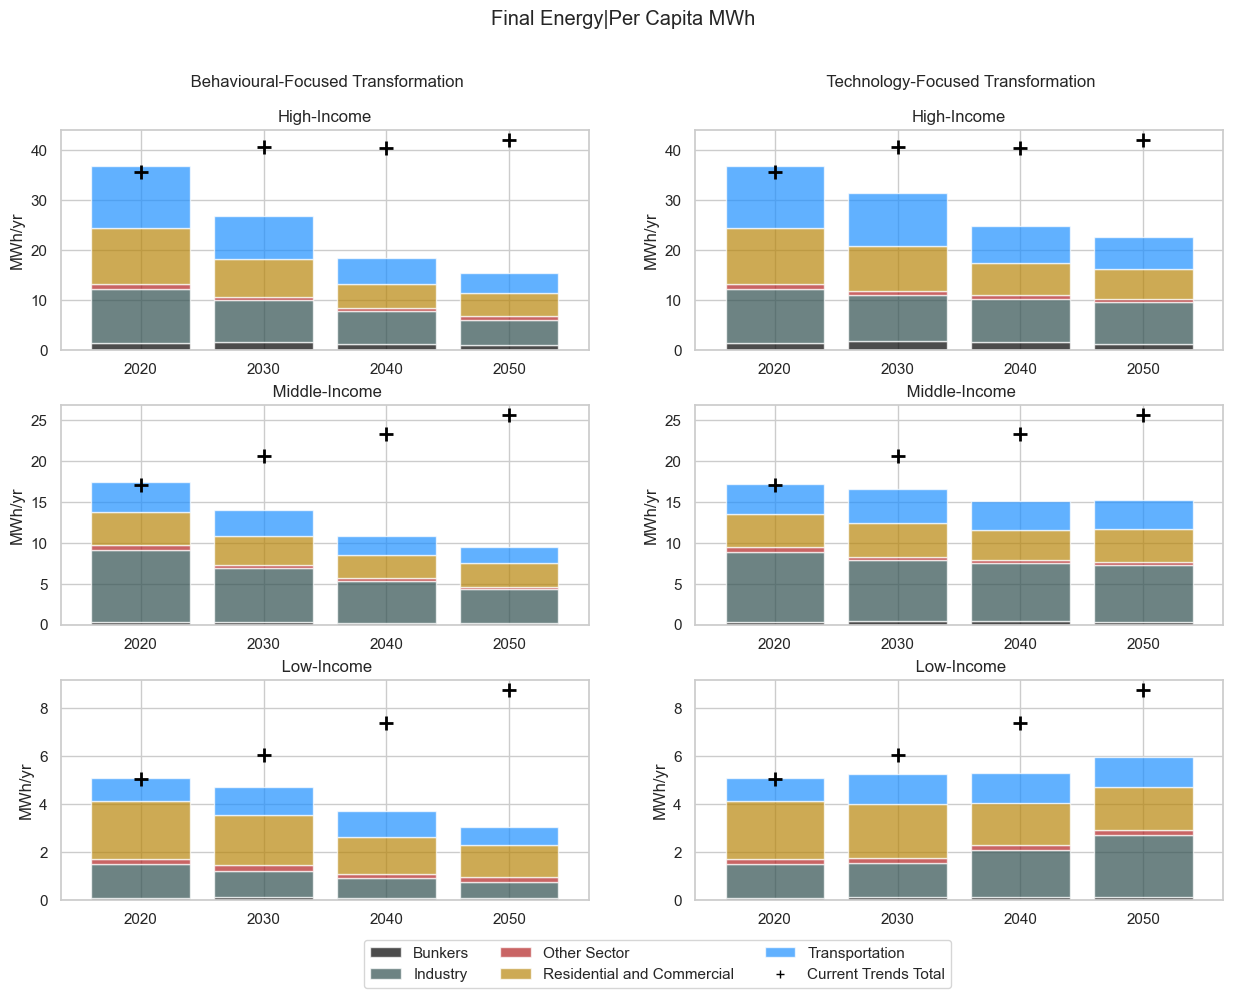

In [11]:
var_dict =  {
    'Secondary Energy|Electricity':[[
        'Secondary Energy|Electricity|Biomass',
        'Secondary Energy|Electricity|Coal',
        'Secondary Energy|Electricity|Gas',
        'Secondary Energy|Electricity|Non-Biomass Renewables',
        'Secondary Energy|Electricity|Nuclear',
        'Secondary Energy|Electricity|Oil',
    ],'Secondary Energy|Electricity', 'Total Final Power Generation (including heat)'],
    'Final Energy|Per Capita MWh':[[
        'Final Energy|Industry|Per Capita GWh',
        'Final Energy|Transportation|Per Capita GWh',
        'Final Energy|Other Sector|Per Capita GWh',
        'Final Energy|Residential and Commercial|Per Capita GWh',
        'Final Energy|Bunkers|Per Capita GWh',
        ],'Final Energy', 'Total Final Energy'],
    }
rename_variables = {
    'Secondary Energy|Electricity|Biomass': 'Biomass',
    'Secondary Energy|Electricity|Coal': 'Coal',
    'Secondary Energy|Electricity|Gas': 'Gas',
    'Secondary Energy|Electricity|Non-Biomass Renewables': 'Non-Biomass Renewables',
    'Secondary Energy|Electricity|Nuclear': 'Nuclear',
    'Secondary Energy|Electricity|Oil': 'Oil',
    'Final Energy|Transportation|Per Capita GWh': 'Transportation',
    'Final Energy|Other Sector|Per Capita GWh': 'Other Sector',
    'Final Energy|Residential and Commercial|Per Capita GWh': 'Residential and Commercial',
    'Final Energy|Industry|Per Capita GWh': 'Industry',
    'Final Energy|Bunkers|Per Capita GWh': 'Bunkers',
    'Current Trends Total': 'Current Trends Total',
}
rename_shares = {
    'Secondary Energy|Electricity': 'Power Generation (including heat)',
    'Final Energy': 'Final Energy Per Capita',
}
rename_scenarios = {
    "LIFE-TP":  "Behavioural-Focused Transformation",
    "TECH-TP":  "Technology-Focused Transformation",
}

for share in var_dict.keys():
    for group in [df_3_energy_geo_trans]:  # Loop through different groups (dataframes)
        
        df_energy_geo = group.copy()
        nrows = 3
        ncols = 2
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), sharey=False)
        unique_regions = ['High-Income', 'Middle-Income', 'Low-Income']
        total_ref = df_3_energy_geo_ref  # Reference dataset for smaller group
        
        axes_flat = axes.flatten()
        num_scenarios = len(df_energy_geo.scenario)
        # Iterate through each region and sc
        # scenario\
        plot_idx = 0
        for idx_region, region in enumerate(unique_regions):
            for idx_scen, scenario in enumerate(df_energy_geo.scenario):
                ax = axes_flat[plot_idx]
                var_list = var_dict[share][0]
                data = df_energy_geo.filter(variable=var_list, scenario=scenario, region=region,
                                             year=[2020, 2030, 2040, 2050])
                # Filter the data for the variable and scenario
                rename_scenario = rename_scenarios.get(scenario, scenario)
                if region == "High-Income":
                    data.plot.bar(stacked=True, title=f' {rename_scenario}\n\n{region}', ax=ax, alpha=0.7, width=0.8)
                else:
                    data.plot.bar(stacked=True, title=f' {region}', ax=ax, alpha=0.7, width=0.8)
                
                patches = ax.patches
                num_patches = len(patches)
                patch_counter = 0
                for i, var in enumerate(var_list):
                    color = color_dict.get(var, 'firebrick')  # Default color if not found in the dict
                    num_patches_per_var = num_patches // len(var_list)
                    for j in range(num_patches_per_var):
                        patches[patch_counter].set_facecolor(color)
                        patch_counter += 1

                ax.set(xlabel=None)
                

                # Overlay the "Total" line from the reference data
                total_plot = total_ref.filter(variable=share, 
                                              region=region, year=[2020, 2030, 2040, 2050])
                # to plot
                total_plot_csv = total_plot.timeseries()
                data_csv = data.timeseries()
                data_csv = data_csv.reset_index()
                # concat
                data_to_csv = pd.concat([data_csv, total_plot_csv])

                variable_name = share.replace("|", "_").replace(" ", "_").replace("/", "").replace("_MWh","")
                data_to_csv.to_csv(f"../../../plots/TOD/final_figures/chpt_19/data_for_figures/{variable_name}_{scenario}_{region}.csv", index=False)

                total_plot_data = total_plot.data
                
                
                for _, row in total_plot_data.iterrows():
                    x_position_dict = {2020: 0, 2030: 1, 2040: 2, 2050: 3}
                    x_position = x_position_dict[row["year"]]
                    ax.plot(x_position, row["value"], color='black', marker='+', markersize=10, 
                            markeredgewidth=2, markeredgecolor='black', markerfacecolor='none', linestyle='--')

                plot_idx += 1
                ax.legend().set_visible(False)
                ax.set_xticklabels([2020, 2030, 2040, 2050],rotation=0)
                

        for row in range(nrows):
            for col in range(0, ncols, 2):  # Iterate over columns in steps of 2 (pairs of subplots)
                if col + 1 < ncols:  # Ensure the second subplot exists
                    ax1 = axes[row, col]
                    ax2 = axes[row, col + 1]
                    ax1.set_ylim(min(ax1.get_ylim()[0], ax2.get_ylim()[0]), max(ax1.get_ylim()[1], ax2.get_ylim()[1]))  # Set the same y-limits

        # === Ensure all subplots have y-ticks and labels ===
        for ax in axes.flat:
            ax.yaxis.set_tick_params(labelleft=True)  # Ensure y-ticks are visible
            if share == 'Secondary Energy|Electricity': 
                ax.set_ylabel("EJ/yr")  # Apply y-axis label to all subplots
            else:
                ax.set_ylabel("MWh/yr")

        plt.subplots_adjust(hspace=0.25)
        rename_share = rename_shares.get(share, share)
        fig.suptitle(rename_share, y=1.0, x=0.5)
        handles, labels = axes[-1,1].get_legend_handles_labels()
        black_line = Line2D([0], [0], color='black', lw=1, marker='+', linestyle='None')
        handles.append(black_line)
        labels.append('Current Trends Total')
        new_labels = [rename_variables.get(label, label) for label in labels]
        if share == 'Final Energy|Per Capita MWh':
            axes[-1, 1].legend(handles, new_labels, bbox_to_anchor=(0.5, -0.15), ncol=3)
        else:
            axes[-1, 1].legend(handles, new_labels, bbox_to_anchor=(0.53, -0.15), ncol=4)
            # Save the plot as PNG and SVG
        variable_name = share.replace("|", "_").replace(" ", "_").replace("/", "").replace("_MWh","")
        plt.savefig(f"../../../plots/TOD/final_figures/chpt_19/{len(unique_regions)}_group/{variable_name}_Shares.png", bbox_inches='tight')
        plt.savefig(f"../../../plots/TOD/final_figures/chpt_19/{len(unique_regions)}_group/{variable_name}_Shares.svg", bbox_inches='tight')



## Final energy per capita


     model                            scenario       region  \
0   Energy  Behavioural-Focused Transformation  High-Income   
1   Energy  Behavioural-Focused Transformation  High-Income   
2   Energy  Behavioural-Focused Transformation  High-Income   
3   Energy  Behavioural-Focused Transformation  High-Income   
4   Energy                      Current Trends  High-Income   
5   Energy                      Current Trends  High-Income   
6   Energy                      Current Trends  High-Income   
7   Energy                      Current Trends  High-Income   
8   Energy   Technology-Focused Transformation  High-Income   
9   Energy   Technology-Focused Transformation  High-Income   
10  Energy   Technology-Focused Transformation  High-Income   
11  Energy   Technology-Focused Transformation  High-Income   

                       variable              unit  year     value  
0   Final Energy|Per Capita GWh  EJ / million / a  2020  0.035278  
1   Final Energy|Per Capita GWh  EJ / millio

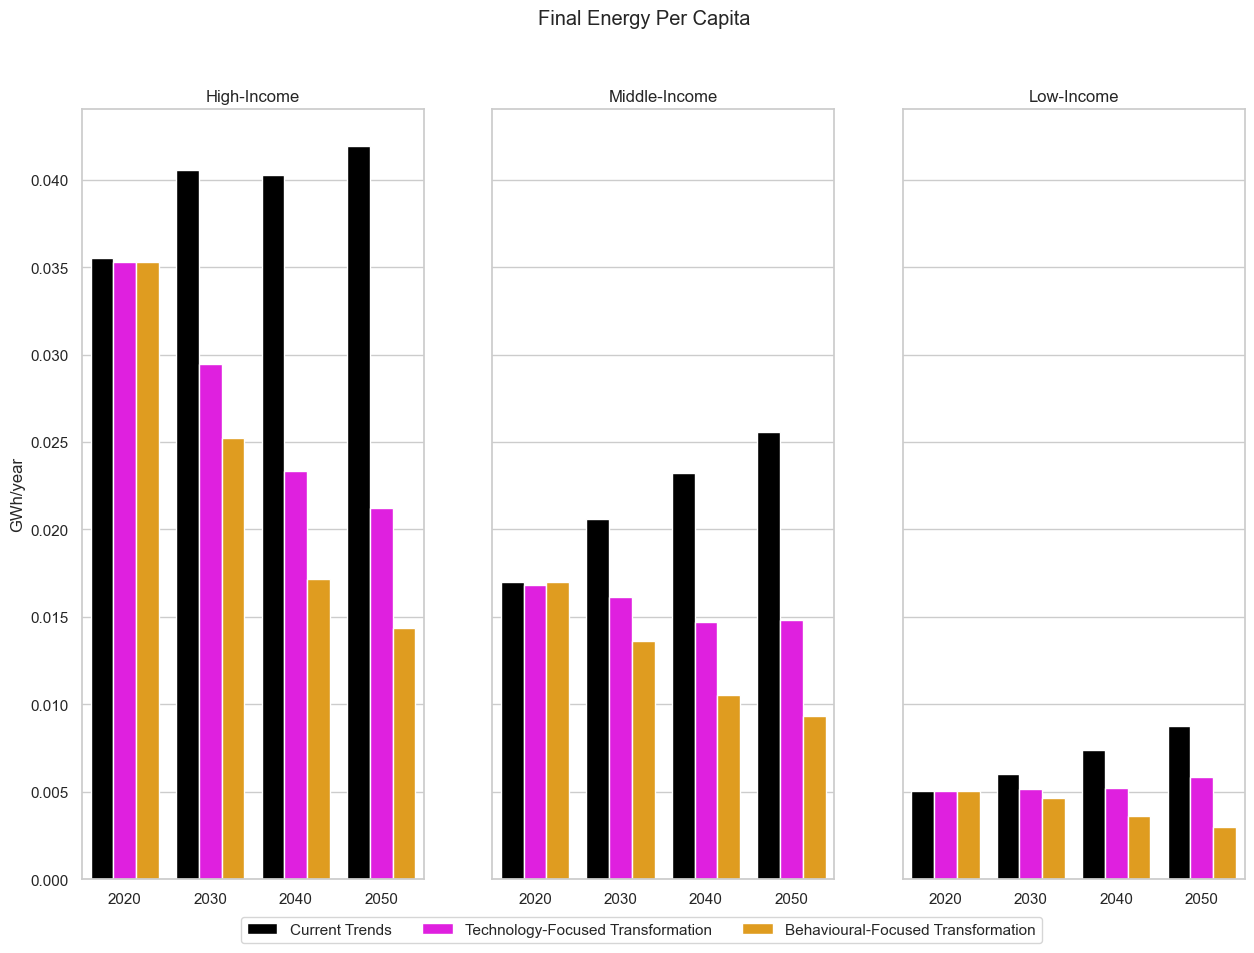

In [87]:
var_dict =  {
    'Final Energy|Per Capita':[[
        'Final Energy|Per Capita GWh',
    ]]
    }
rename_variable = {
    'Final Energy|Per Capita GWh':'Final Energy Per Capita'
    }
rename_shares = {
    'Final Energy|Per Capita':'Final Energy Per Capita'
}
rename_scenarios = {
    "LIFE-TP":  "Behavioural-Focused Transformation",
    "TECH-TP":  "Technology-Focused Transformation",
    "REF":      "Current Trends",
}

df_energy_geo = df_3_energy_geo_all.copy()
df_energy_geo.filter(year=[2020,2030,2040,2050],inplace=True)
df_energy_geo = df_energy_geo.multiply("Final Energy|Per Capita",0.277777778,"Final Energy|Per Capita GWh")
df_energy_geo.rename(scenario=rename_scenarios, inplace=True)
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), sharey=True)
unique_regions = ['High-Income', 'Middle-Income', 'Low-Income']
axes_flat = axes.flatten()
num_scenarios = len(df_energy_geo.scenario)

for share in var_dict.keys():
    for i, region in enumerate(unique_regions):
        ax = axes_flat[i]
        var_list = var_dict[share][0]

        region_data = df_energy_geo.filter(variable=var_list, region=region).data

        print(region_data)
        region_data["year"] = region_data["year"].astype(str)
        # # Define the color palette for scenarios
        scenario_colors = {
            "Current Trends": "black",
            "Behavioural-Focused Transformation": "orange",
            "Technology-Focused Transformation": "magenta",
        }
        desired_scenario_order = ["Current Trends"] + ["Technology-Focused Transformation"] + ["Behavioural-Focused Transformation"]
        # Convert 'scenario' column to a categorical type with the desired order
        region_data["scenario"] = pd.Categorical(region_data["scenario"], categories=desired_scenario_order, ordered=True)

        # Convert 'scenario' column to a categorical type with the desired order
        region_data["scenario"] = pd.Categorical(region_data["scenario"])

        sns.barplot(
            data=region_data,
            x="year",
            y="value",
            hue="scenario",
            palette=scenario_colors,
            ax=ax,
            order=sorted(region_data["year"].unique())
        )

        ax.legend().set_visible(False)
        # Set labels and titl
        ax.set_xlabel('')
        ax.set_ylabel("GWh/year")
        #ax.set_ylabel(region_data["unit"].iloc[0])
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
        ax.set_title(region)  # Set the title to the variable
rename_share = rename_shares.get(share, share)       
fig.suptitle(rename_share)

handles, labels = ax.get_legend_handles_labels()
new_labels = [rename_variables.get(label, label) for label in labels]
desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
fig.legend(sorted_handles, sorted_labels, bbox_to_anchor=(0.77, 0.08),ncol=3)
    # Save the plot as PNG and SVG
variable_name = share.replace("|", "_").replace(" ", "_").replace("/", "")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_19/{len(unique_regions)}_group/{variable_name}.png", bbox_inches='tight')
plt.savefig(f"../../../plots/TOD/final_figures/chpt_19/{len(unique_regions)}_group/{variable_name}.svg", bbox_inches='tight')
